# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
The smartcab remains stationary at a set of traffic lights during the simulation. The traffic lights periodically change signals and the other cars are driving around the grid as expected.

The smartcab received positive reward for remaining stationary at a red light, the reward it receives appears to vary between +1.5 and +3. If the light is green the smartcab's reward depends whether there is oncoming traffic or not. On a green light with no oncoming traffic the smartcab is penalised for being stationary by being rewarded between -4 to -6. In contrast on a green light WITH incoming traffic it receives a small positive reward of about +1. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- agent.py flags:
    - learning: a switch which determines whether the cab is implements Q-learning or acts randomly.
    - display: determines whether visualisation of simulation is shown. If the visualisation is switched off the simulation can run faster.
    - alpha: sets the learning rate, going from 0 to 1. It determines the size of each learning step the agent takes. In other words, by how much each new learning instance changes the agent's "knowledge". A value of 0 means the agent does not learn from new learning instances, while with a value of 1 whatever is learned in a new instance would completley override previous "knowledge" of the agent (i.e. only last learning instance is considered).
- environment.py - There are two functions that are called when an agent performs an action:
    - .sense returns information about the agent's suroundings - the traffic light state and what other agents at the intersection are doing.
    - .act actually performs the action, works out if there were any violations, calculates the reward to award the agent (using the data from the .sense function) and updating necessary varibales. 
- simulator.py - The render_text function prints text giving information about the simulation at each timestep in the command prompt - the model paramaters when init, the state of the smartcab, what it did, the resulting reward, time remaining, etc.  The render function uses the pygame library to create a visual representation of the simulation (only if pygame installed).
- planner.py - The next_waypoint function considers the East-West direction first.




-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


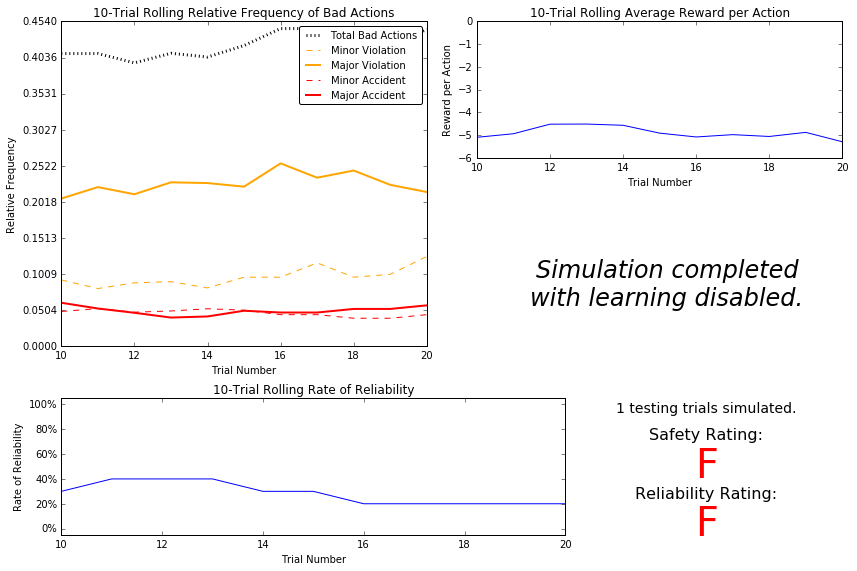

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

On average between 40-45% of the actions taken by the agent are bad, about a quarter of which lead to a minor or major accident. It is suprising that more than half of the random actions turn out to be good, but it does make sense thinking about what is happening. Ignoring other traffic for a minuite, the agent will be at a red light 50% of the time (since they are switching at a regular interval). Out of the 4 actions it can take at a red light 2 are good (stop or turn right - assumes no oncoming traffic) and two are bad. Furthermore at a green light one of the four actions is bad (stopping). Therefore with no other traffic on the roads we would expect to get 37.5% bad actions. Adding the traffic on the roads pushes this rate of bad actions up since an additional two actions will become bad if there is oncoming traffic (turning right at a red light and left at a green light).

Reliability rate is ~20%, so in 1/5 trials the agent actually reaches the destination before the deadline. The deadline is set at the begining of each trial to be 5 x (number of intersections between start and destination). Given more time the agent would be expected to reach the destination more often. The deadline here does seem relativly generous, giving the random walking agent a good chance to reach the destination. Eventhough I cannot think of an intuitive way to work out an expectation, I think 20% does seem resonable here. A way to check this value could be to change the 5x multiplyer used in setting the deadline and check that the reliability rate varies as expected. 

The average reward the agent received per trial is about -5. This suggests that the agent is heavily penalised for it's poor saftey and reliability record.

Although the outcomes vary slightly as the number of trials increases, these variations are relativley small and do not change the ratings awarded to the agent. This is as expected since the agent does not learn, so no improvement is expected. Furthermore the above plots are of 10-trial rolling averages and we are seeing trials 11 to 20, so the number averaged trials does not change either.

This smartcab would be considered neither safe nor reliable for it's passengers since it is awarded the lowest rating possible in both categories. On average, 1 in every 20 actions taken by the agent leads to a major accident, making it quite unsafe. Furthermore it only reaches it's destination in the allowed time 20% of the time so it is very unreliable.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** 

For efficiency the most relevant feature is the 'waypoint'. The direction pointed to needs to be abided to if the smartcab is to reach the destinations in the fastest time possible.
While for saftey both the 'inputs' data is most relevant. In order to perform a safe action at each state (intersection) the smartcab's action will be dependent on (some of) the 4 flags in 'inputs'.

Therefore 'deadline' and 'right' features are not necessary for learning either safety or efficency:
- 'deadline': including the deadline would bloat our state space significantly since it can take any positive multiple of five (max set by the grid size of our environment)! But more importantly, the deadline is not necessary since the smartcab' behaviour does not depend on the deadline value. The smartcab is trying to reach it's destination as fast and safley as possible, irrispective of the deadline. Since there is no reward given to the agent for actually reaching the destination, the deadline would be redundant information for agent trying to maximise reward. But even if we added a reward for reaching the destination, including the deadline could cause the agent to take illigal actions to reach the destination in time, which would be undesireable.
- 'right': there is no scenario when we would need to know what the car to the right is doing in order to respect the US traffic laws. At a red light the agent would only need to know the status of the car on our left to determine if we can turn right. At a  green light then the agent has the right of way unless it was turning left, in which case it would need to know if there was oncoming traffic.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** 
'waypoint' has three possible values (left, right, forward), 'light' has two, while 'oncoming', 'right' and 'left' each have four (None, left, right, oncoming). So in total number of possible states are 3 x 2 x 4^2 = 96 states.

The state space here is indeed quite managable. If we assume that in each trial the agent could meet approximatley 20 intersections/states, then the agent could in theory be able to explore the whole state space in ~5 trials. However it should also be considered that the agent will not always meet unique states so more trials will be necessary. Furthermore at each state the agent has 4 choices of actions to take, so it would need to visit each state more than 4 times to fully explore it.

Therefore I expect that the agent should be able to visit all states and the Q-learning should converge in 50-100 trials. Given how long the above simulation took, such simulating this number of trials would only take a few minuites on my machine.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

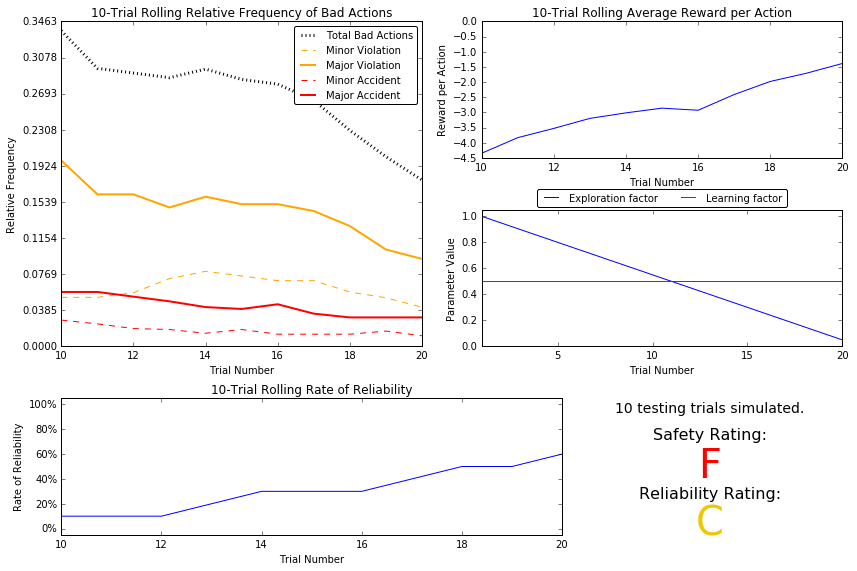

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

The number of trials performed by our agent follows from the linear decay of epsilon, which was reducing by 0.05 each trial starting from a value of 1, as seen in the centre-right chart. Since the tolerance for epsilon before testing begins is <0.05, 20 trials were performed. 

The percentage of bad/illegal actions taken by the agent start out to be approximately the same as with the random agent, but quickly starts to improve with the number of training trials (and reducing epsilon).  This makes sense since it starts out as a random agent and we see that the learning starts making a difference quickly even with a relatively high epsilon. It is noteworthy that the portion of major violation and accidents reduces much faster than the portion of minor violations and accidents - a consequence of those violations resulting in a larger penalty. Furthermore as epsilon reduces and the agent learning improves with the number of trials the average reward per action the agent receives also improves.

The learning has also led the agent's reliability to improved as compared to the random agent. We see that as the epsilon is reduced and the agent starts to increasingly rely on what it has learned, the reliability increases to ~60%. It is important to note that in examining the Q-table there appears to be a local mimimum which forces the agent to take a wrong turn, hence affecting it's reliability. At a red light with a waypoint pointing forward, the agent receives a small positive reward for turning right. Although legal, this can lead the agent to get lost if the full set of actions it can take at that state have not been explored. So random exploration is particulalry important for a reliable agent.

It is evident from the charts that the agent's performance could improve further with more training since the graphs have not converged to a baseline value by the 20th trial. Furthermore the final Q-table it can be observed that the state space has not yet been fully explored. Although the Q-table contains ~93 states out of a possible 96, it is clear that the majority of actions associated with those states has not been fully explored since there are still a lot of '0.00' in the Q-table.

So in conclusion the q-learning agent appears to be effectivley learning the traffic rules and to follow the waypoint to the destination. But the limited learning run here means the agent still only achieves a saftey rating of F and a reliability rating of C.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

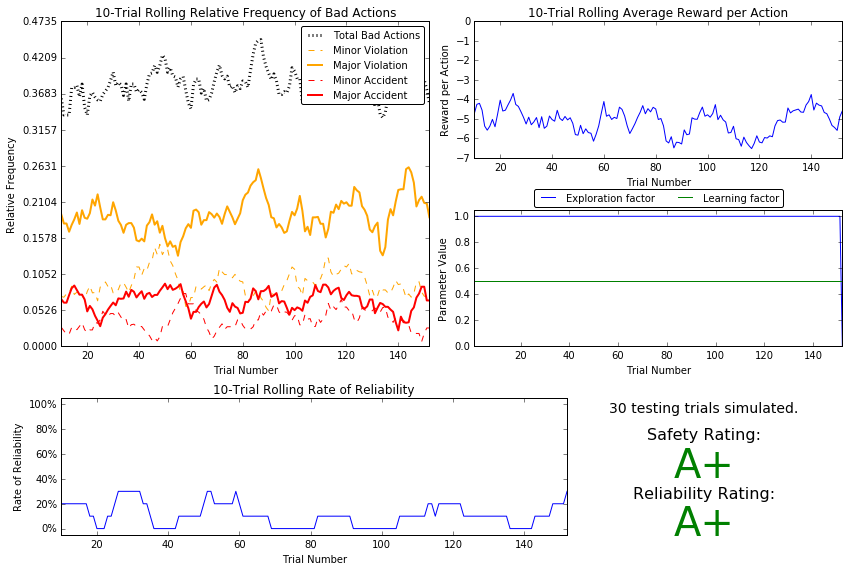

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

**- note on Q-learning function**
For my Q-learnign implementation here I have not included the max_nextState (i.e. set gamma=0) as will be discussed in Question 9 below.

**- choice of espilon**

The simplified setup in this exercise there is no benefit to "exploitation" actions during the learning run i.e. acting what has been already learned rather than taking a random action. The reson for this is:
- The testing and learning runs are separate and independent. In the learning run we just want to maximise the learning (we don't care about achieving goals) while in the testing run exploratory actions are specifically disabled.
- The environment is very symetric (has translational and 90deg rotational invariance). In otherwords all intersections are completley identical (from all directions). So there are no parts of the grid that are worse or better than others (i.e there are no one way streets or dead-ends). This means there are no parts of the grid the agent does or does not want to go to. Taking "exploration" actions in effect allows the system to learn to prefer actions which would lead to state with high reward. So propagete that reward out to actions which could lead to that highly desirable state. But in the case for this exervice there are no such high value states.
- There is no reward for reaching the destination. This makes sense since the destination moves around so would just end up producing a background "reward noise" for our grid. This is because the destination moves around so the location the agent would get most reward would be different in each run.

Therefore to maximise learning during the training run I chose to use a step function for espilon, were it is set to 1 for 150 trials. It is then set to 0, which triggers the training run to end and testing run to begin. The threashold is therefore irrelevant here as long as it is >0 and <1, so I have kept it to 0.05. I have chosen 500 trials since this appears to be the least number of runs which lead to an A rating for both saftey and reliability.

Given this choice of epsilon, the visulas above provide no information on the learning process. But I run separate simulations not shown here, with a decaying epsilon to inform my choice in other parameters.

**- choice of alpha**

In some of my simulations I observed that the output curves were not smooth but rather have a lot of andulations. I believe these are a result of a model finding local minima (appearing as a sudden improvemnet of the model performance) but then managing to get out of them (hence the model performance appears to degrade). 

The model here shows only a weak dependence of the model on the choice of alpha. A very large alpha (but <1) leads the simulation into many local minima, but these are shallow so simulation quicky gets out of them as well. The effect of this is to delaying learning the policy a little. On the other hand a very small alpha (but >0) does produce a more stable learning were the simulation is less prone to getting dragged into local minima, however the learning is very slow. In my simulation I chose alpha=0.5 as a good balance of the two effects which delay learning.

**- choice of other parameters**

I have chosen to use 30 testing trials here. I increased this from 10 to get more consistency in my testing, because I was getting too much variablity in my results. I am concious of the fact that this increase makes a good saftey rating harder to achieve as this is a measure of actual number of bad actions which occur and the probablility of these occuring never gets to 0. However more testing trials makes the testing more representative of the behaviour.

**- results**
Using the above parameters, my agent performs as well as can be expected, achieving the best possible A+ rating for both saftey reliability.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

Examples of optimal policy:

- If red light and waypoint is not right, then action should be None i.e. wait at traffic lights
- If red light and waypoint is right and left is None (i.e. no traffic coming from the left) then turn right.
- If light is green, waypoint is left and no oncoming traffic, then turn left
- If light is green, waypoint is left and there is oncoming traffic, then wait (action=None)

Example states from sim_improved-learning.txt:

- State 1 = (waypoint: 'forward', light: 'red', oncoming: 'right', right: None, left: None)
 -- forward : -9.36
 -- right : 0.37
 -- None : 1.33
 -- left : -39.61

- State 2 = (waypoint: 'forward', light: 'red', oncoming: 'right', left: 'left')
 -- forward : 0.00
 -- right : 0.24
 -- None : 0.00
 -- left : -20.01
 
States 1 and 2 above both have a waypoint pointing forward but are both on a red light. For both of these states the optimal policy would be to wait (i.e. None should give max reward). This is indeed policy for state 1 but the policy for state 2 is to turn right, which is sub-optimal. Note that state 2 does not violate the traffic laws, but it is sub-otpimal because it deviates from the waypoint, which will likely delay the agent getting to it's destination. However since there is a way for the agent to obey the traffic laws while also not deviating from the waypoint, that is the optimal policy i.e. None.

By looking at the rewards of the two states I will venture to speculate that State 1 is more common than State 2 and as such better explored. This can be seen by the 0.00's in State 2 but also by noticing that there are another 3 cars at the intersection, which is rearer than the one other can in State 1. As such it would appear that state 2 is in a local minima, and further (random) exploration is necessary to get it out of it.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** I have touched on the reasons in my solution and answers above, which are:
- One thing the future reward allows the agent to do is to learn characteristics about the environment which would cause it to behave differently if it were to look forward a few moves. But the starting and ending position are moving around and there are no fixed local characteristics in the environment (i.e. dead-ends). So each run the environment looks completley different to the agent. So the future reward an agent would be gaining from reaching the destination in one trial could end up taking the agent in the wrong direction in the next run because the destination is no longer in the same place.
- Given the lack of discount factor, in a typical implementation of Q-learning the values in the Q-table will increasingly become larger and positive as a state is visited more times. That is because each time we revisit a (state,action) we are adding two numbers (scaled by alpha) - the imediate reward and the argmax of the new state rewards. Furthermore as the rewards in states become larger, the "future rewards" part of the new reward will increasingly become dominant as compared to the imediate reward. At that point the agent no longer learns from the imediate reward but only from the "future reward" which in this case has no meaning (see point 1 above). To avoid this problem I have added a factor of 0.5 to normalise the additional reward at each iteration and stop it becomeing increasingly large.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.